In [1]:
import numpy as np
import pandas as pd
import json as js
import matplotlib.pyplot as plt

In [2]:
data = pd.read_json("Monthlydata.json")

In [3]:
data_new = data["outputs"]["monthly"]

In [4]:
insolation_ratio = [i["Kd"] for i in data_new]

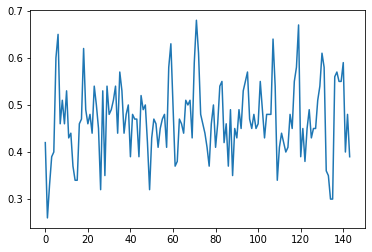

In [5]:
plt.plot(insolation_ratio)

In [6]:
mean_insolation_ratio = np.mean(insolation_ratio)
print(f"{mean_insolation_ratio=:.3f}")

mean_insolation_ratio=0.469


In [7]:
temperature = [(i["T2m"],i["month"]) for i in data_new]

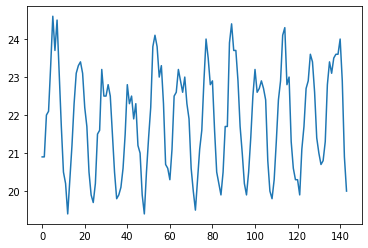

In [8]:
plt.plot([t[0] for t in temperature])

In [9]:
monthly_temp = [[k[0] for k in temperature[i::12]] for i in range(0,12)]

In [10]:
average_temp = [np.mean(i) for i in monthly_temp]

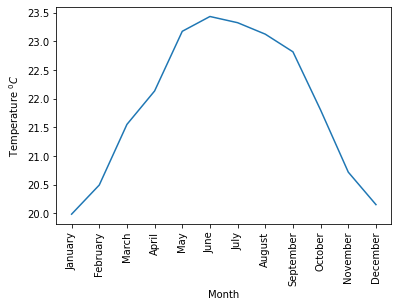

In [11]:
plt.xticks([i for i in range(12)],['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'],rotation=90)
plt.xlabel("Month")
plt.ylabel("Temperature $^0C$")
plt.plot(average_temp)
plt.savefig("Average_Temperature",bbox_inches='tight')
plt.show()

In [12]:
simulated_data = pd.read_json("Monthly_Average_Data.json")["outputs"]["monthly"]["fixed"]

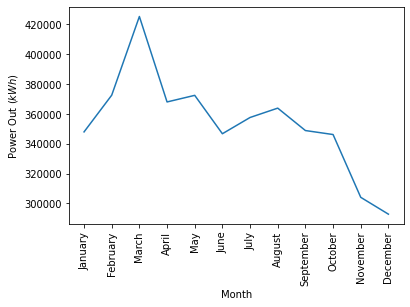

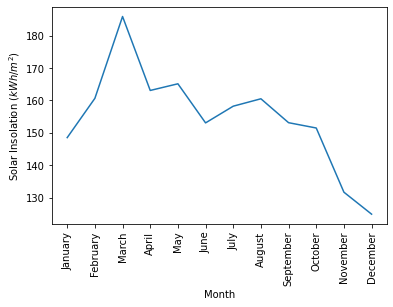

In [13]:
simulated_data
power_out = np.array([monthly_data["E_m"] for monthly_data in simulated_data])
solar_insolation = np.array([monthly_data["H(i)_m"] for monthly_data in simulated_data])
efficiency = power_out/solar_insolation
plt.xticks([i for i in range(12)],['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'],rotation=90)
plt.xlabel("Month")
plt.ylabel("Power Out (${kWh}$)")
plt.plot(power_out)
plt.savefig("Power Out",bbox_inches='tight')
plt.show()
plt.xticks([i for i in range(12)],['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'],rotation=90)
plt.xlabel("Month")
plt.ylabel("Solar Insolation (${kWh}/{m^2}$)")
plt.plot(solar_insolation)
plt.savefig("Solar Insolation",bbox_inches='tight')
plt.show()

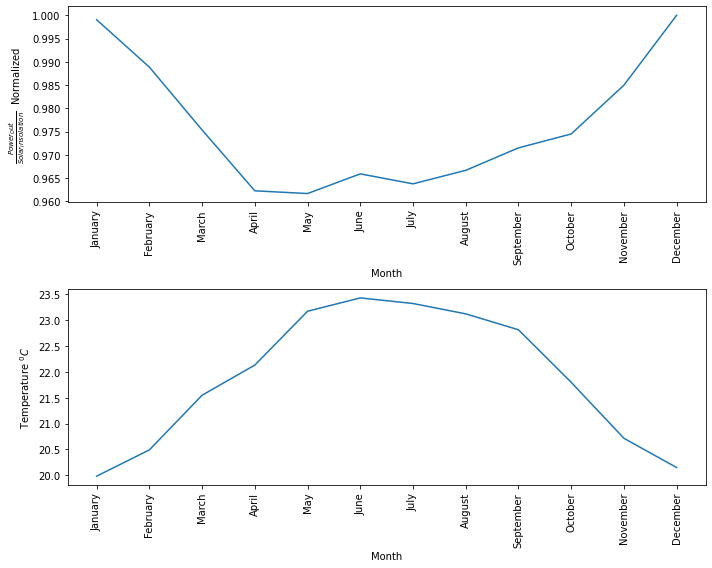

In [16]:
efficiency = power_out/solar_insolation
fig, ax = plt.subplots(2, 1,figsize=(10,8))

ax[0].set_xticks([i for i in range(12)],['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'],rotation=90)
ax[0].set_xlabel("Month")
ax[0].set_ylabel("$\\frac{Power_Out}{Solar_Insolation}$  Normalized")
normalized_efficiency_metric = (efficiency)/np.max(efficiency)
ax[0].plot(normalized_efficiency_metric)
# plt.subplot(212)
ax[1].set_xticks([i for i in range(12)],['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'],rotation=90)
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Temperature $^0C$")
ax[1].plot(average_temp)


fig.savefig("Efficency",bbox_inches='tight')
fig.tight_layout()
plt.show()


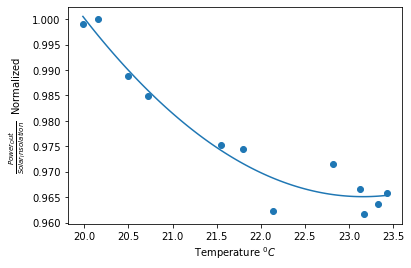

In [43]:
plt.scatter(average_temp,normalized_efficiency_metric)
series = np.polynomial.polynomial.Polynomial.fit(average_temp,normalized_efficiency_metric,deg=2)
plt.xlabel("Temperature $^0C$")
plt.ylabel("$\\frac{Power_Out}{Solar_Insolation}$  Normalized")
plt.plot(series.linspace()[0],series.linspace()[1])
plt.savefig("Effciency_vs_Temperature",bbox_inches='tight')
plt.show()